In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    return -1*np.matmul(A,psi)

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]] #-5, -5
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, x[2]], [x[2], 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    O = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)
    
    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

In [3]:
x = []
x.append(random.uniform(-5, 5))
a=x[0]
x.append(x[0])
x.append(x[0])

i = 0

psi0 = [[complex(1,0)],[complex(0,0)]]
psid = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

D = np.zeros((2,1), dtype=np.complex_)
D[0][0] = psid[0][0]
D[1][0] = psid[1][0]

Resp = np.zeros((2,1000), dtype=np.complex_)

while i < 1000:
    
    print("iteracao: ", (i+1))
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]

    resultado = optimize.minimize(fo, x, args=(D, H, i, psi0), method='BFGS')
    
    x = []
    u = np.zeros((2,1))
    x.append(random.uniform(-5, 5))
    a=x[0]
    x.append(x[0])
    x.append(x[0])
    
    u = [[0, resultado.x[0]],[resultado.x[0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.9997525050460009-0.015704066384705208j)], [(-0.0004949671237150102-0.01575010831721283j)]]
iteracao:  2
[[(0.998399042856903-0.03135398724757724j)], [(-0.002711740122259626-0.04699919991257399j)]]
iteracao:  3
[[(0.9958088586014381-0.04687168503459445j)], [(-0.00689755972272006-0.07823161270587642j)]]
iteracao:  4
[[(0.9920403540604026-0.06218091581699798j)], [(-0.013002593087594943-0.10872166829574281j)]]
iteracao:  5
[[(0.9871251537896614-0.07720660581035865j)], [(-0.020983577125952536-0.13850183720958753j)]]
iteracao:  6
[[(0.9810269357112925-0.09186432925747919j)], [(-0.03083788771243799-0.16791700158647316j)]]
iteracao:  7
[[(0.9738575121524339-0.10609437875835058j)], [(-0.04247434202557522-0.19631978274674688j)]]
iteracao:  8
[[(0.9656171362622891-0.11982026429083556j)], [(-0.055854183170847053-0.22384583610289507j)]]
iteracao:  9
[[(0.9564673826573601-0.1330066914131284j)], [(-0.07084379332973378-0.24992102812594721j)]]
iteracao:  10
[[(0.9464702590108168-0.145

[[(0.5513556066576701-0.30272593230020517j)], [(-0.0790318249907524+0.7733808658537733j)]]
iteracao:  83
[[(0.5499466312939265-0.3111046302592798j)], [(-0.04392288715531694+0.7738497139414527j)]]
iteracao:  84
[[(0.5484944570703648-0.3196123968484758j)], [(-0.008906577426769209+0.7726075376021464j)]]
iteracao:  85
[[(0.5469426106182376-0.3282552837638981j)], [(0.02595429394069708+0.7696938429324246j)]]
iteracao:  86
[[(0.5449910794931265-0.3370163771513856j)], [(0.060710302502120915+0.7653227631133005j)]]
iteracao:  87
[[(0.5427454668758438-0.3458785941570573j)], [(0.09524658146243752+0.7594230920164419j)]]
iteracao:  88
[[(0.5403391185073607-0.35484579491039364j)], [(0.1294271596271537+0.7519087024288288j)]]
iteracao:  89
[[(0.5375512976108155-0.36387120592186023j)], [(0.16328188486283124+0.7429504435154403j)]]
iteracao:  90
[[(0.5344238137748466-0.37293961192891917j)], [(0.19672558898339082+0.7325341378967676j)]]
iteracao:  91
[[(0.5311094258261206-0.38207593054018524j)], [(0.2296108

[[(-0.15305159674383664-0.6959500143975248j)], [(-0.3924456967215984-0.5815626731773146j)]]
iteracao:  164
[[(-0.16439761868936645-0.6931471776454895j)], [(-0.41993154077538286-0.5622969816645063j)]]
iteracao:  165
[[(-0.175234546092767-0.6905035456162383j)], [(-0.445915246969016-0.5419015420060355j)]]
iteracao:  166
[[(-0.186328939513698-0.687428952914948j)], [(-0.4712976802617764-0.5201936551491269j)]]
iteracao:  167
[[(-0.19716237734240866-0.6843607149711021j)], [(-0.4953582007548455-0.49739083517683014j)]]
iteracao:  168
[[(-0.20815600854695618-0.6808945184701835j)], [(-0.5186164640968347-0.47338216603639865j)]]
iteracao:  169
[[(-0.21890828375900745-0.677444138719038j)], [(-0.5404624321159596-0.4483848154687299j)]]
iteracao:  170
[[(-0.22988175209553965-0.6734594492053293j)], [(-0.5615432301946478-0.42222734625804054j)]]
iteracao:  171
[[(-0.24050851350818575-0.6696562937983451j)], [(-0.5809360757253738-0.3952585988023872j)]]
iteracao:  172
[[(-0.25090830725965085-0.66593604401594

[[(-0.6998565119826003-0.09917888998898591j)], [(0.6254350274517813+0.33044729157867986j)]]
iteracao:  241
[[(-0.7013206846526273-0.08818876531624592j)], [(0.6403050962330201+0.3006349917616119j)]]
iteracao:  242
[[(-0.702639095845651-0.07711633169550874j)], [(0.6537607740010635+0.27008924128733486j)]]
iteracao:  243
[[(-0.70372680860733-0.0661681352235143j)], [(0.66574982033325+0.239097279126572j)]]
iteracao:  244
[[(-0.7047102534717652-0.055010818441741674j)], [(0.6762800199901452+0.20737063056879126j)]]
iteracao:  245
[[(-0.7054361932947601-0.04412263757657482j)], [(0.6852886976623701+0.17547748054558313j)]]
iteracao:  246
[[(-0.7060496480358269-0.03300331904246275j)], [(0.692795121999124+0.1429670226933142j)]]
iteracao:  247
[[(-0.7064773497565754-0.021929744862501765j)], [(0.6987603810506009+0.1101941267584827j)]]
iteracao:  248
[[(-0.7067648304379918-0.010589658297501333j)], [(0.7031753891841055+0.07691346233178425j)]]
iteracao:  249
[[(-0.7068280196080158+0.0003080470401906066j)

[[(-0.3407480076742863+0.6194662391007565j)], [(-0.7072144955438554+3.1152868026101954e-05j)]]
iteracao:  318
[[(-0.3309738061905236+0.624805925876858j)], [(-0.7063710123849563+0.03337449907170626j)]]
iteracao:  319
[[(-0.32111838360680295+0.6299347420159922j)], [(-0.7040082261282149+0.06661525125489043j)]]
iteracao:  320
[[(-0.31117814103590036+0.6349487219137514j)], [(-0.7000451062933912+0.09972514128763865j)]]
iteracao:  321
[[(-0.30118270304929656+0.6396648643669607j)], [(-0.6946565731118992+0.13255208637968083j)]]
iteracao:  322
[[(-0.29107251647990756+0.6444312458946017j)], [(-0.6875336784563983+0.16517436202155372j)]]
iteracao:  323
[[(-0.2809295113046973+0.6488682160535547j)], [(-0.6790428050446998+0.1973562416822586j)]]
iteracao:  324
[[(-0.27067341128149436+0.6532914498643098j)], [(-0.6689036248581396+0.22915954240408182j)]]
iteracao:  325
[[(-0.2603818526133562+0.6574537069559027j)], [(-0.6573748682256618+0.26041153171964504j)]]
iteracao:  326
[[(-0.2500559380345286+0.661386

[[(0.4999122976851559+0.5000320943797371j)], [(0.5303614388851462-0.46773101982898446j)]]
iteracao:  400
[[(0.5076633773752517+0.4920740429562163j)], [(0.5077809238961856-0.492239299858177j)]]
iteracao:  401
[[(0.5154120113551507+0.4841188413130844j)], [(0.4839526475093778-0.5155280830431047j)]]
iteracao:  402
[[(0.5229700710056728+0.4759787439813071j)], [(0.4591153290324785-0.5377356395874182j)]]
iteracao:  403
[[(0.5304911650793794+0.4677930721143119j)], [(0.4331838852054816-0.5586595119583018j)]]
iteracao:  404
[[(0.53756942104005+0.4592545518215079j)], [(0.40654734809760396-0.5786394310114904j)]]
iteracao:  405
[[(0.5447869114340955+0.45080018715259984j)], [(0.3787859038306624-0.5970825860371977j)]]
iteracao:  406
[[(0.5515702513002604+0.4420512677486028j)], [(0.35040292335978634-0.6144743191409981j)]]
iteracao:  407
[[(0.5586485781148056+0.4334404570022128j)], [(0.32093039624405745-0.6301148943761322j)]]
iteracao:  408
[[(0.5653188511425173+0.42457966046188267j)], [(0.290936464518

[[(0.6399061802579198-0.3009773656327549j)], [(-0.21842278842501206+0.672476132629109j)]]
iteracao:  478
[[(0.6351639807398879-0.3109727709914988j)], [(-0.18653273670691756+0.6819590522516884j)]]
iteracao:  479
[[(0.6301077981533365-0.320933514366593j)], [(-0.15415611599336287+0.6900736855052647j)]]
iteracao:  480
[[(0.6250212558734065-0.3307850866137699j)], [(-0.12149384993175874+0.6965406362843755j)]]
iteracao:  481
[[(0.6196604909580056-0.340574184875213j)], [(-0.08850343569727523+0.7015676729452991j)]]
iteracao:  482
[[(0.6142613581648325-0.3502628422531478j)], [(-0.05537053413558002+0.7049347390968834j)]]
iteracao:  483
[[(0.6086570013601613-0.3598692928004338j)], [(-0.02208803281200291+0.706783434128618j)]]
iteracao:  484
[[(0.6028776595977966-0.36938525524326665j)], [(0.011258225270571194+0.707082930222301j)]]
iteracao:  485
[[(0.597188010374821-0.3788181113557727j)], [(0.04445125030202859+0.705611339283693j)]]
iteracao:  486
[[(0.5907873028710722-0.3881158996929314j)], [(0.0778

[[(-0.07747752391816728-0.7028702281617966j)], [(-0.18665903278192833-0.6820036896756975j)]]
iteracao:  557
[[(-0.0888597655190017-0.7014582453903464j)], [(-0.218942803609405-0.6724018681665155j)]]
iteracao:  558
[[(-0.09914196430180013-0.7002370031784498j)], [(-0.249613170225189-0.6614621886345571j)]]
iteracao:  559
[[(-0.1104225322644431-0.6984716786102193j)], [(-0.2808087071656687-0.6489149404185636j)]]
iteracao:  560
[[(-0.12172173387381427-0.6964901657930425j)], [(-0.3114360512299304-0.6348959015009317j)]]
iteracao:  561
[[(-0.1326721009842425-0.6944788581735127j)], [(-0.3410261450748034-0.6195146073835285j)]]
iteracao:  562
[[(-0.14338529674559045-0.6924151224146585j)], [(-0.36962790714706917-0.602807694316883j)]]
iteracao:  563
[[(-0.15422930261759907-0.6900868940581062j)], [(-0.3975970769430724-0.5847306357071735j)]]
iteracao:  564
[[(-0.16508388665537865-0.6875543709366418j)], [(-0.4247412281521359-0.5653416113014805j)]]
iteracao:  565
[[(-0.1760036142346859-0.6847638977535137

[[(-0.6875365300111312-0.16516296584849177j)], [(0.507870986053434+0.4920180096266254j)]]
iteracao:  635
[[(-0.6900492397605698-0.15433964936364625j)], [(0.5304853906802351+0.4675430623999183j)]]
iteracao:  636
[[(-0.6923890137272695-0.14348101047639247j)], [(0.551920967715092+0.4420337591248429j)]]
iteracao:  637
[[(-0.6945431090120383-0.13260663791952534j)], [(0.5721268403371897+0.41556729094157274j)]]
iteracao:  638
[[(-0.6965372532210498-0.12168538260849608j)], [(0.5910667529521199+0.3881604841356192j)]]
iteracao:  639
[[(-0.6984724006086149-0.11055048005188418j)], [(0.6087250670221942+0.3596785161845822j)]]
iteracao:  640
[[(-0.7000254073062379-0.09974276618834921j)], [(0.6249671576015432+0.3308047866053372j)]]
iteracao:  641
[[(-0.7015142949102123-0.08871746752472315j)], [(0.639858542355278+0.3009782315950288j)]]
iteracao:  642
[[(-0.7028123605549683-0.07770819781567337j)], [(0.65332412126794+0.2705249701290911j)]]
iteracao:  643
[[(-0.7039440815702834-0.0666650381762193j)], [(0.

[[(-0.38825379405197985+0.5910409047021806j)], [(-0.6875651596463813-0.16487489600580577j)]]
iteracao:  713
[[(-0.3788821879472518+0.5968728491035039j)], [(-0.6947370564471843-0.13240638844932553j)]]
iteracao:  714
[[(-0.36947753705771263+0.6028601980837367j)], [(-0.7001073830661944-0.09947624299140426j)]]
iteracao:  715
[[(-0.35997714688383553+0.6087210578799516j)], [(-0.7039010221105974-0.06632056979029664j)]]
iteracao:  716
[[(-0.3503625937355798+0.6141602706468549j)], [(-0.706366631609282-0.03315623672656045j)]]
iteracao:  717
[[(-0.34067401936823255+0.6196821517501333j)], [(-0.7070609188740478+0.00019917183463074445j)]]
iteracao:  718
[[(-0.33089964905673075+0.6249188548293536j)], [(-0.7063004199083139+0.03348885236700413j)]]
iteracao:  719
[[(-0.3210395140188032+0.6300838015353172j)], [(-0.7038987111247205+0.06674261865303452j)]]
iteracao:  720
[[(-0.3111162304167104+0.6349440754877101j)], [(-0.7000687462135404+0.09978177118065434j)]]
iteracao:  721
[[(-0.30109127164414967+0.6398

[[(0.4420876933433306+0.5519419871838971j)], [(0.6531819698058006-0.27068757290793377j)]]
iteracao:  793
[[(0.45069780403401105+0.5449190852661371j)], [(0.6397147382162987-0.3011638544258885j)]]
iteracao:  794
[[(0.4591025438061737+0.5375786539797316j)], [(0.624981098242638-0.3311081475456557j)]]
iteracao:  795
[[(0.4674717567183385+0.5302694082366717j)], [(0.6087169080818645-0.3602057336768579j)]]
iteracao:  796
[[(0.4758809305259794+0.5230781906824558j)], [(0.5908858568405362-0.3883044989482663j)]]
iteracao:  797
[[(0.48396798906039384+0.5154387388858518j)], [(0.5720261401259497-0.4157931219735262j)]]
iteracao:  798
[[(0.4919901267481551+0.5077548638139845j)], [(0.5518210912274937-0.44229416670717203j)]]
iteracao:  799
[[(0.5000148549664594+0.500093066135493j)], [(0.5302557928580385-0.4676759532535566j)]]
iteracao:  800
[[(0.5077882654409734+0.49215616386583094j)], [(0.5076566144621415-0.49215656315961503j)]]
iteracao:  801
[[(0.5155373451269493+0.4841981815070389j)], [(0.48383312473

[[(0.6613928633107193-0.24994383359663117j)], [(-0.3693049894175539+0.6030765396994568j)]]
iteracao:  873
[[(0.6574309420862843-0.2602757021105919j)], [(-0.340506313283778+0.619755188241542j)]]
iteracao:  874
[[(0.6531084051732743-0.27064805988993373j)], [(-0.3108655754802113+0.6352649527041251j)]]
iteracao:  875
[[(0.6490561387391045-0.2807471642498081j)], [(-0.280721550785745+0.6489241070907721j)]]
iteracao:  876
[[(0.6442834494004767-0.2910193505303585j)], [(-0.24971191523153752+0.6617026983982717j)]]
iteracao:  877
[[(0.6400326609724561-0.3009666188592577j)], [(-0.21845012814603662+0.6723516608816701j)]]
iteracao:  878
[[(0.6350944210078077-0.3110209952603265j)], [(-0.18647317091631427+0.6820181086453015j)]]
iteracao:  879
[[(0.6301567078385538-0.3209520303845276j)], [(-0.15415119379470674+0.6900214882258804j)]]
iteracao:  880
[[(0.6247420669147827-0.330866818283626j)], [(-0.12133065907898657+0.6967806659771496j)]]
iteracao:  881
[[(0.6198759574986189-0.34058104267690875j)], [(-0.0

[[(-0.033184379214562965-0.7063316729318676j)], [(-0.055552643437057556-0.7049171511898826j)]]
iteracao:  953
[[(-0.04457229752565855-0.7056903644044988j)], [(-0.08899544623762967-0.7014942279133567j)]]
iteracao:  954
[[(-0.05534915289526593-0.7049511461118915j)], [(-0.12163698064961324-0.6965520218192693j)]]
iteracao:  955
[[(-0.0662886779001188-0.7040209968217749j)], [(-0.1541855865193471-0.6900630212839364j)]]
iteracao:  956
[[(-0.07751156780009649-0.7028485548131047j)], [(-0.18669783946995802-0.6820115129026032j)]]
iteracao:  957
[[(-0.08852189352650275-0.7015504963876734j)], [(-0.21859702771733824-0.6724626650766526j)]]
iteracao:  958
[[(-0.09981499399569-0.6999709529029183j)], [(-0.25033040150796504-0.6613714864829164j)]]
iteracao:  959
[[(-0.11050618029530279-0.6984374931560191j)], [(-0.28089687984480366-0.6488993111999523j)]]
iteracao:  960
[[(-0.12138802011244855-0.6966509213895113j)], [(-0.3110708423969226-0.6349624352251503j)]]
iteracao:  961
[[(-0.13234425926176704-0.694643

/home/gabriel/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


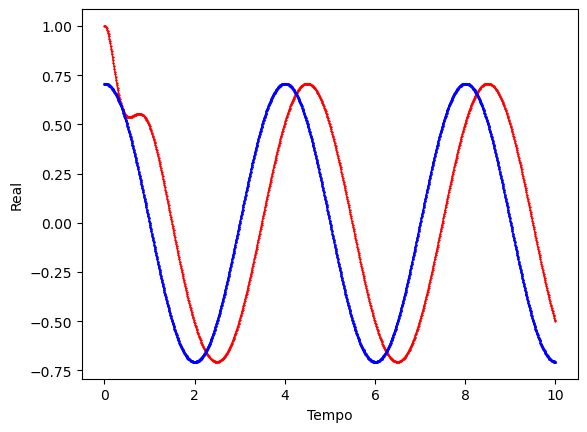

In [4]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()

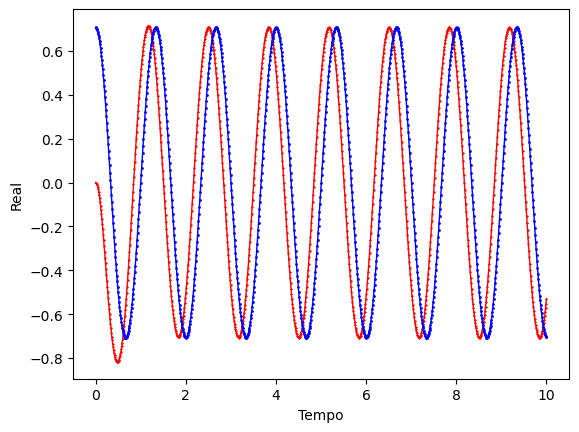

In [5]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()